<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Random_Forest_fraud_assign_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud dataset**

In [66]:
import pandas as pd
from sklearn import datasets
import matplotlib as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree


In [67]:
df=pd.read_csv('/content/Fraud_check.csv')

In [68]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [69]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [70]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])


In [71]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [72]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [73]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


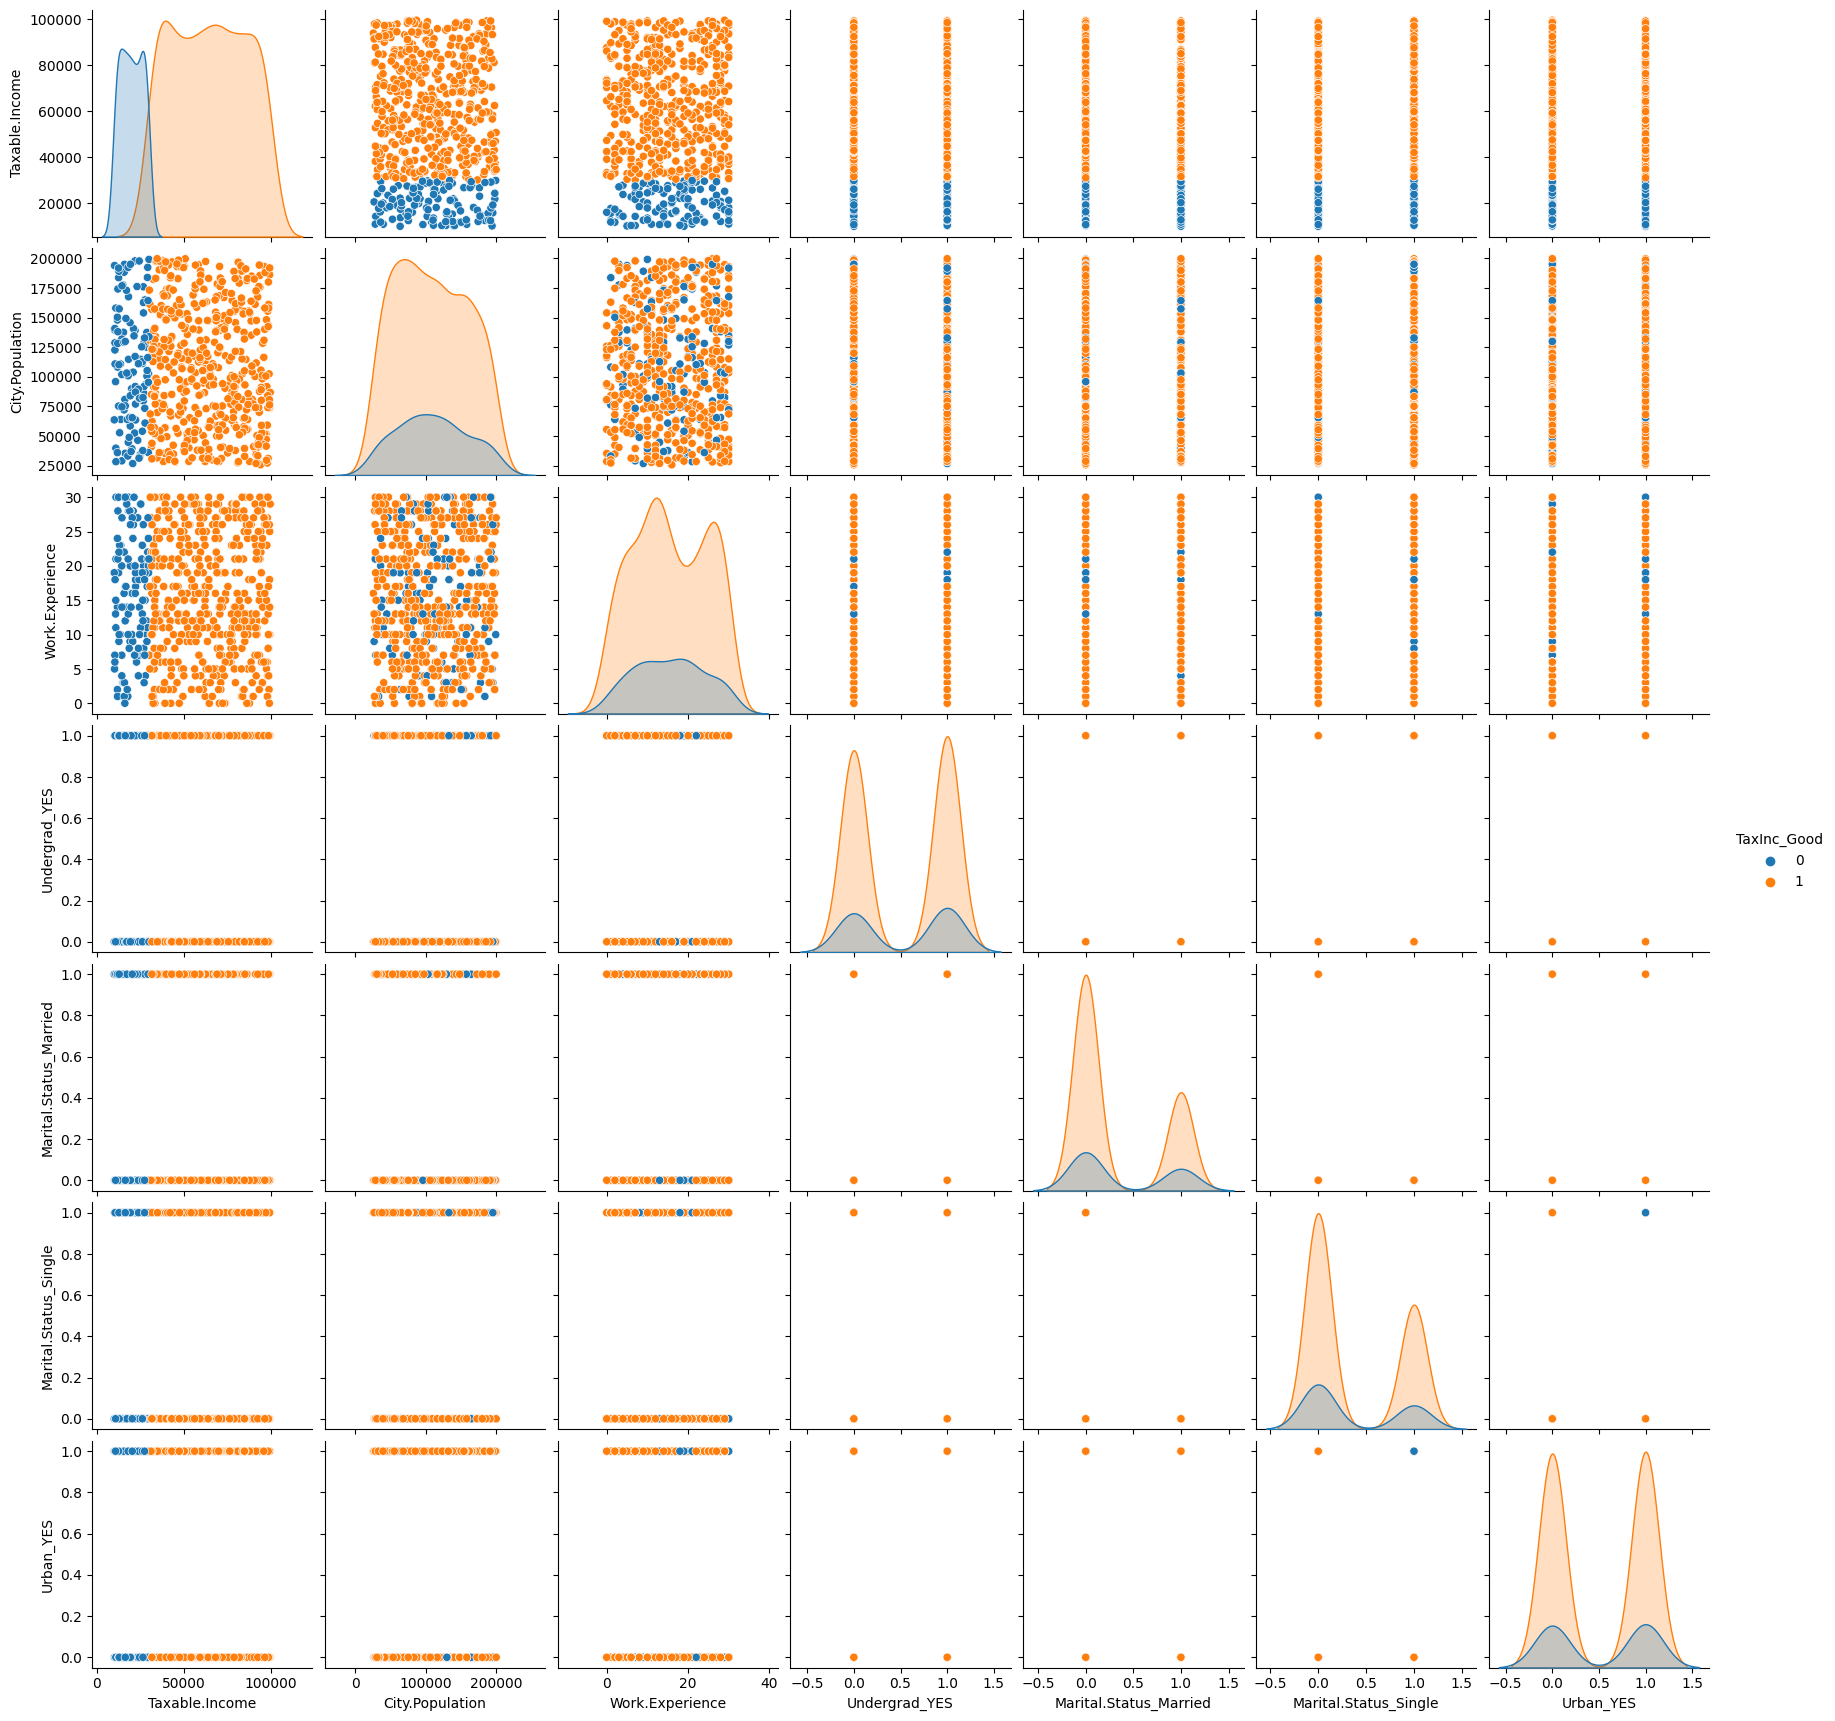

In [74]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [75]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [76]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [77]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [78]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
##Converting the Taxable income variable to bucketing.
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [80]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [81]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [82]:
    ##Splitting the data into featuers and labels
features = df.iloc[:,0:6]
labels = df.iloc[:,6]

In [83]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:6]
target = colnames[6]

In [84]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [85]:
#Building Model
from sklearn.ensemble import RandomForestClassifier as RF
model=RF(n_jobs= 15 ,n_estimators = 15,oob_score=True, criterion ='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=15,
                       oob_score=True)

In [86]:
##Predictions on train data
prediction = model.predict(x_train)

In [87]:
# For accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [88]:
accuracy

0.9875

In [89]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [90]:
confusion


array([[ 93,   6],
       [  0, 381]])

In [91]:
##Prediction on test data
pred_test = model.predict(x_test)
##Accuracy
acc_test =accuracy_score(y_test,pred_test)

In [92]:
acc_test

0.7416666666666667

**Building Decision Tree Classifier using Entropy criteria**

In [93]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model1.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 24.5\nentropy = 0.734\nsamples = 480\nvalue = [99, 381]'),
 Text(0.3, 0.625, 'x[0] <= 197925.0\nentropy = 0.776\nsamples = 371\nvalue = [85, 286]'),
 Text(0.2, 0.375, 'x[1] <= 13.5\nentropy = 0.769\nsamples = 369\nvalue = [83, 286]'),
 Text(0.1, 0.125, 'entropy = 0.72\nsamples = 211\nvalue = [42, 169]'),
 Text(0.3, 0.125, 'entropy = 0.826\nsamples = 158\nvalue = [41, 117]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.625, 'x[0] <= 64003.0\nentropy = 0.553\nsamples = 109\nvalue = [14, 95]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.8, 0.375, 'x[0] <= 67197.5\nentropy = 0.659\nsamples = 82\nvalue = [14, 68]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.9, 0.125, 'entropy = 0.61\nsamples = 80\nvalue = [12, 68]')]

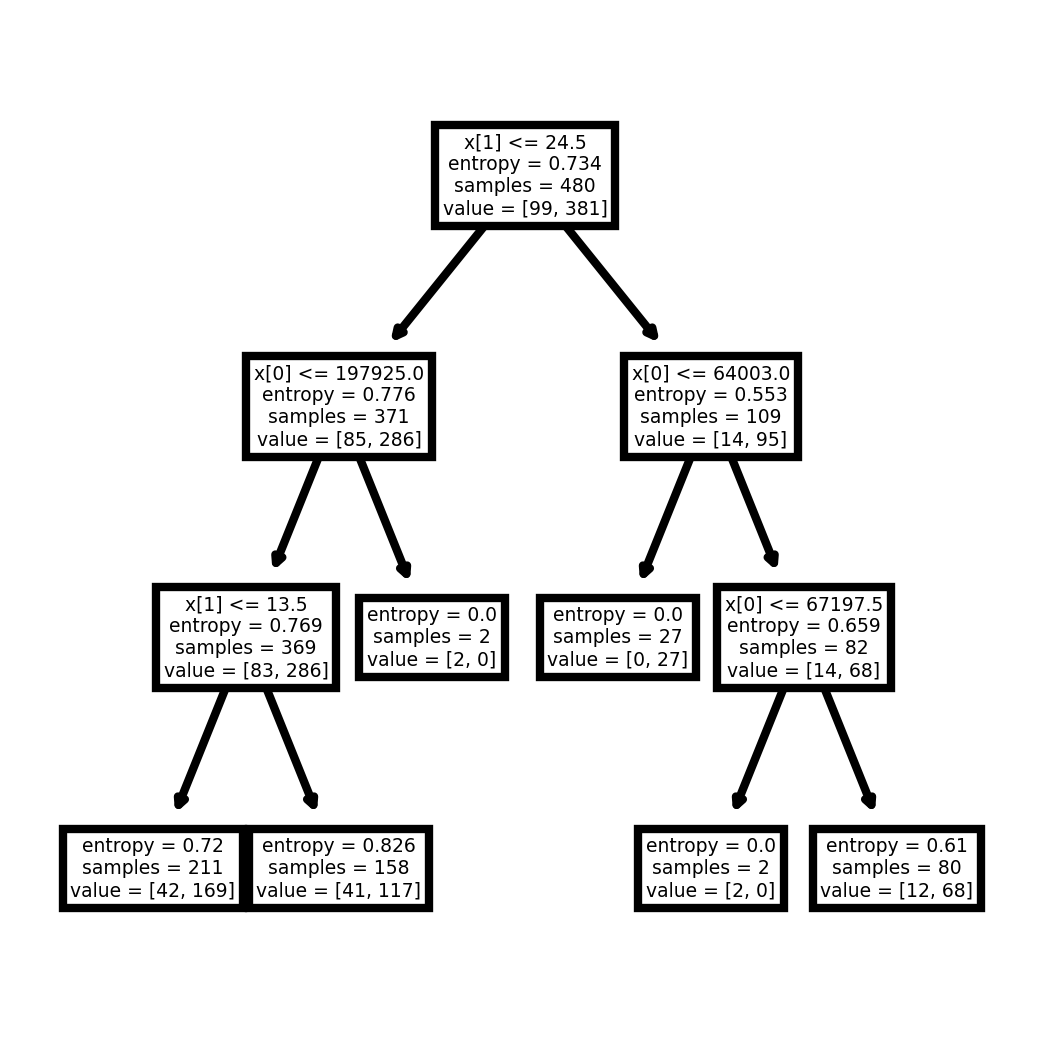

In [94]:
#plot decisionn Tree
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(model1)

In [95]:
colnames = list(df.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

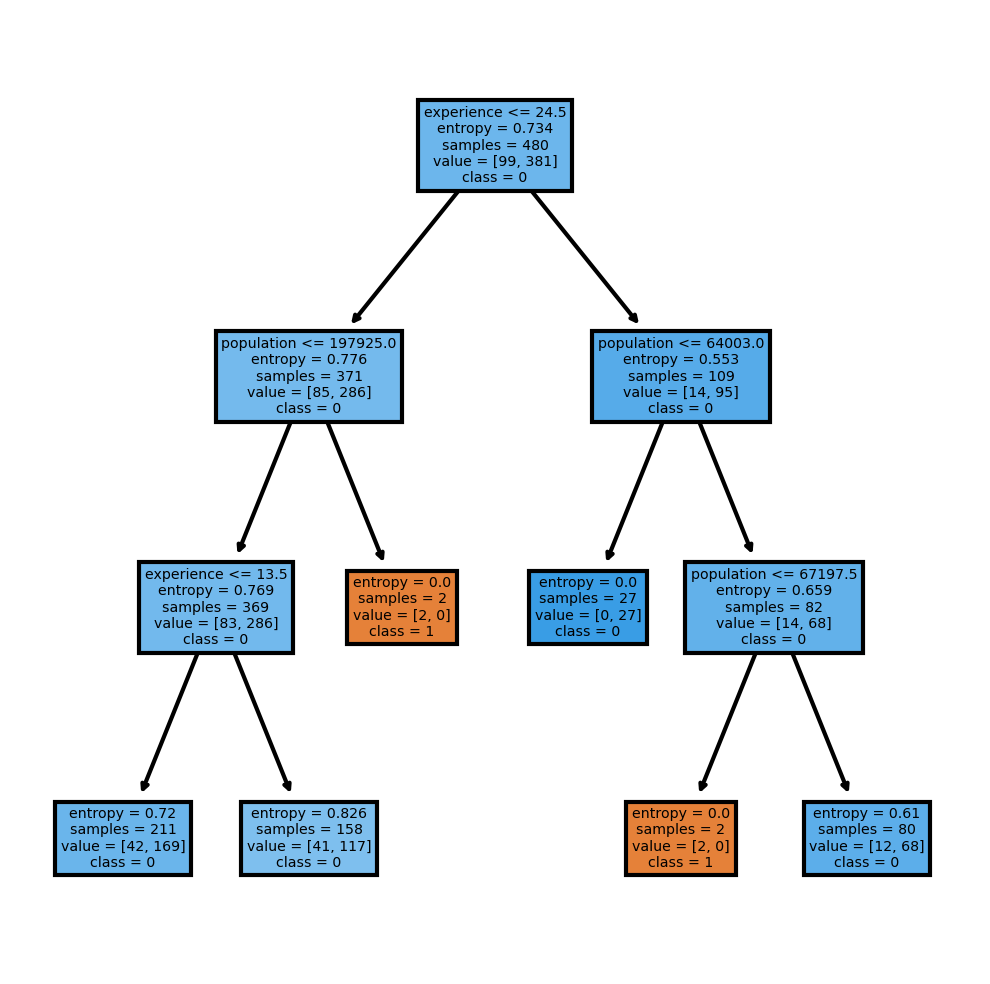

In [96]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [97]:
#Predicting on test data
preds = model1.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    118
0      2
dtype: int64

In [98]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [99]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
TaxInc_Good,,
0,0,25
1,2,93


In [100]:
# Accuracy
np.mean(preds==y_test)

0.775

**Building decision tree classifier using Gini criteria**

In [101]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [102]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

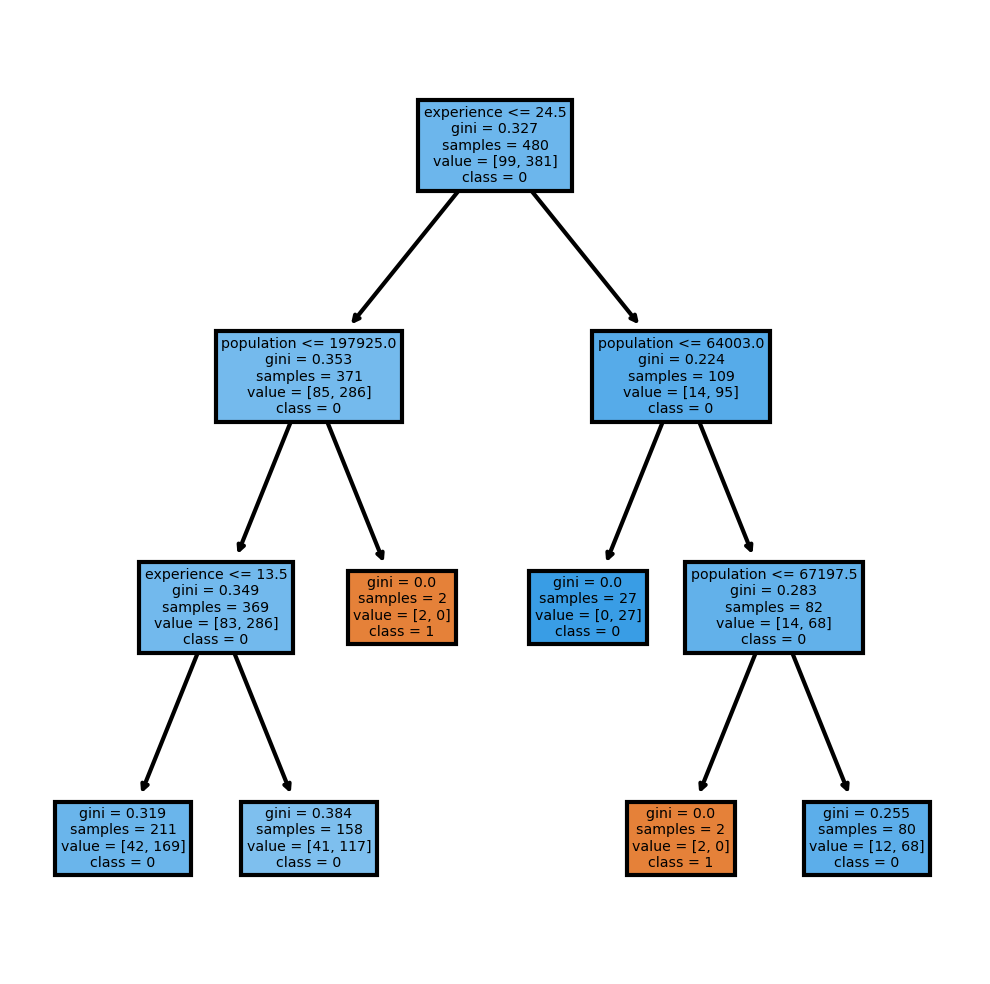

In [103]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [104]:
#Predicting on test data
predicts = model1.predict(x_test) # predicting on test data set
pd.Series(predicts).value_counts() # getting the count of each category

1    118
0      2
dtype: int64

In [105]:
predicts


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [106]:
pd.crosstab(predicts,y_test)

TaxInc_Good,0,1
row_0,,
0,0,2
1,25,93


In [109]:
accuracy_score(predicts,y_test)

0.775